In [188]:
# 폰트 문제 해결하기
import platform
import matplotlib.pyplot as plt

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [195]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns

%matplotlib inline

In [140]:
price = pd.read_csv("Apartment price.csv", encoding="euc-kr",header=10)
#단위 1,000단위, #2017년 12월을 기준으로 설정

In [141]:
#나중에 '구별' merge 함수 이용하기 위해 엑셀 value가 구별이 아닌 것은 전부 구별로 수정
price.rename(columns={price.columns[0]: '구별'}, inplace=True)

In [142]:
price.head()

,구별,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,...,2017년 08월,2017년 09월,2017년 10월,2017년 11월,2017년 12월,2017년 중위값 평균,2018년 01월,2018년 02월,2018년 03월,2018년 04월
0,종로구,435000,435000,435000,435000,435000,435000,435000,435000,435000,...,426000,427000,427500,428500,537500,431833.33,540000,550000,565000,570000
1,중구,496909,496909,492500,492500,487500,485000,485000,485000,480000,...,527000,529000,529000,533500,600000,527166.67,617500,632500,635000,647500
2,용산구,780000,780000,780000,780000,780000,778000,776500,770000,765000,...,735000,735000,735000,735000,885000,727791.67,900000,937500,950000,950000
3,성동구,476500,475000,474000,474000,471500,469000,462500,459000,457000,...,504000,500500,502000,509500,622500,509416.67,633500,650000,656000,658000
4,광진구,557500,557500,557500,550000,550000,547500,545000,542500,540000,...,597500,597500,601000,607500,700000,597708.33,715000,720000,733500,740000


In [105]:
price2 =price.loc[:,['구별','2017년 12월']]

In [106]:
price2.sort_values(by="2017년 12월", ascending=False)

,구별,2017년 12월
22,강남구,1265000
21,서초구,1185000
23,송파구,960000
2,용산구,885000
4,광진구,700000
13,마포구,650000
19,동작구,632500
25,서울 평균,625831
3,성동구,622500
14,양천구,605000


In [107]:
price2.set_index("구별", inplace=True)

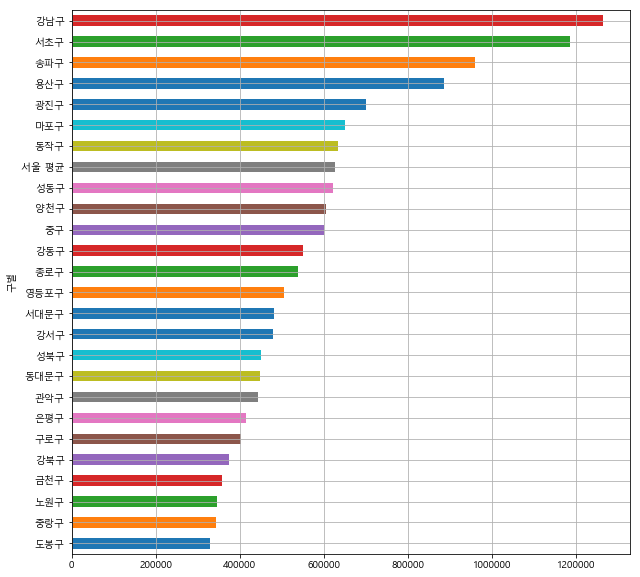

In [108]:
plt.figure()
price2['2017년 12월'].sort_values().plot(kind='barh', grid=True, figsize=(10,10),) # 수평 막대 그래프를, 그리드를 사용하여, 그림 크기를 10*10으로 지정함.
plt.show()

 - 2017년 12월 기준으로 아파트 가격을 최상위에서 최하위까지 9억원이상 차이가 나는데 왜 차이가 나는지 변수를 알아보자

In [154]:
money = pd.read_csv("Seoul money.csv", encoding="euc-kr",)
money.rename(columns={money.columns[0]: '구별'}, inplace=True)
money.columns[0]

'구별'

In [150]:
money2= money.loc[:,['구별','2017']]
money2.sort_values(by="2017", ascending=False)

,구별,2017
0,서울평균,80.5
2,중구,58.4
23,강남구,58.2
22,서초구,52.5
1,종로구,50.8
24,송파구,42.8
3,용산구,42.4
19,영등포구,42.0
4,성동구,34.5
14,마포구,32.9


In [163]:
data_result = pd.merge(price, money2, on='구별')
data_result2 = data_result.loc[:,['구별','2017년 12월','2017']]
data_result2.head()

,구별,2017년 12월,2017
0,종로구,537500,50.8
1,중구,600000,58.4
2,용산구,885000,42.4
3,성동구,622500,34.5
4,광진구,700000,28.1


In [168]:
# 그래프 그리기를 위한 set_index => 구별을 중심
data_result2.set_index("구별", inplace=True)

In [169]:
np.corrcoef(data_result2["2017년 12월"],data_result["2017"])

array([[1.        , 0.62028877],
       [0.62028877, 1.        ]])

 - 아파트 가격이 높으면 취득세 및 재산세등 지방세 세원이 많아지므로 지방세로 걷어들일 수 있는 조세수입이 많아지게 된다.
재정자립도란 전체재원중에 지방정부의 자립재원비율을 말하는데 아파트가격이 높은 구들은 재정자립도 비율이 높기 때문에 자신들의 자치구를 위한
구별계획을 시행하기 쉬울 것이다. 재정자립도와 아파트 가격의 상관관계는 0.6202로 양의 상관관계를 나타내므로 아파트가격이 비쌀수록
구들의 재정자립도가 높은 모습을 볼 수 있다.

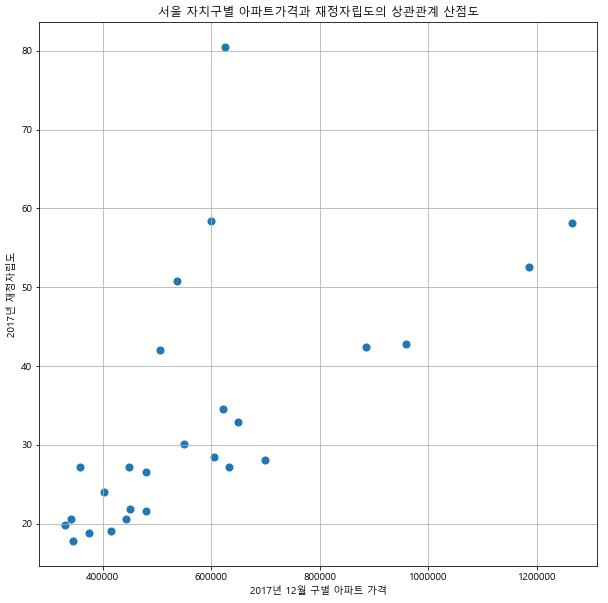

In [204]:
plt.figure(figsize=(10,10))
plt.scatter(data_result2['2017년 12월'], data_result2['2017'], s=50)
plt.xlabel('2017년 12월 구별 아파트 가격')
plt.ylabel('2017년 재정자립도')
plt.title("서울 자치구별 아파트가격과 재정자립도의 상관관계 산점도")
plt.grid()
plt.show()

In [200]:
# polyfit 함수를 이용해 지정한 특정 차수의 다항식 계수를 계산하고,
fp1 = np.polyfit(data_result2['2017년 12월'], data_result2['2017'], 1)
fp1
# poly1d함수로 그 계수를 사용하여 실제 다항식을 만든다.
f1 = np.poly1d(fp1) # y축
fx = np.linspace(200000, 1200000, 100) # x축
data_result2['오차'] = np.abs(data_result2['2017'] - f1(data_result2['2017년 12월']))
df_sort = data_result2.sort_values(by='오차', ascending=False)

Accent
Blues
BrBG
BuGn
BuPu
CMRmap
Dark2
GnBu
Greens
Greys
OrRd
Oranges
PRGn
Paired
Pastel1
Pastel2
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Set1
Set2
Set3
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
tab10
tab20
tab20b
tab20c
terrain
winter


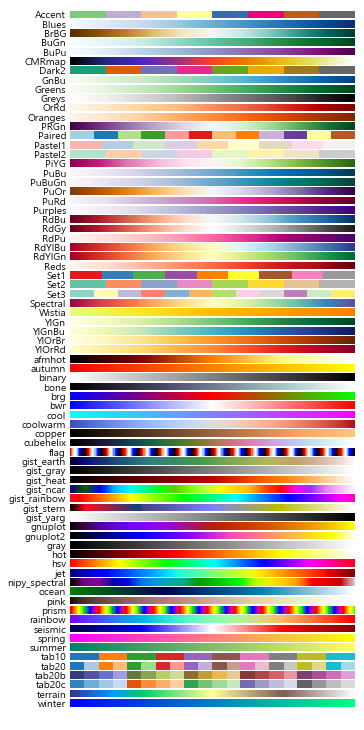

In [210]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0, 1, 256).reshape(1, -1)       # (1, 256)
a = np.vstack((a,a))                            # (2, 256)

# colormap 목록 표시. '_r'로 끝나는 이름은 reverse 버전.
maps = sorted(m for m in plt.cm.datad if not m.endswith('_r'))
nmaps = len(maps) + 1
print(*maps, sep='\n')

fig = plt.figure(figsize=(5, 10))
fig.subplots_adjust(top=0.99, bottom=0.01, left=0.2, right=0.99)

for n, m in enumerate(maps, 1):
    ax = plt.subplot(nmaps, 1, n)
    plt.axis("off")         # 가로축과 세로축에 표시되는 숫자 및 테두리 제거

    plt.imshow(a, aspect='auto', cmap=plt.get_cmap(m), origin='lower')

    # subplot 영역 계산. x, 너비, 높이는 같고, y만 바뀜.
    bounds = list(ax.get_position().bounds)
    x, y, cx, cy = bounds

    # y축에 출력되는 colormap 이름이 y축에 달라붙지 않도록 간격 띄움.
    # 정렬(left, center, right)은 x 좌표가 왼쪽, 가운데, 오른쪽에 있음을 명시하는 것임.
    # right를 줬다면 출력 문자열의 오른쪽에 x 좌표가 오게 된다.
    fig.text(x - 0.01, y, m, fontsize=10, horizontalalignment='right')

plt.show()

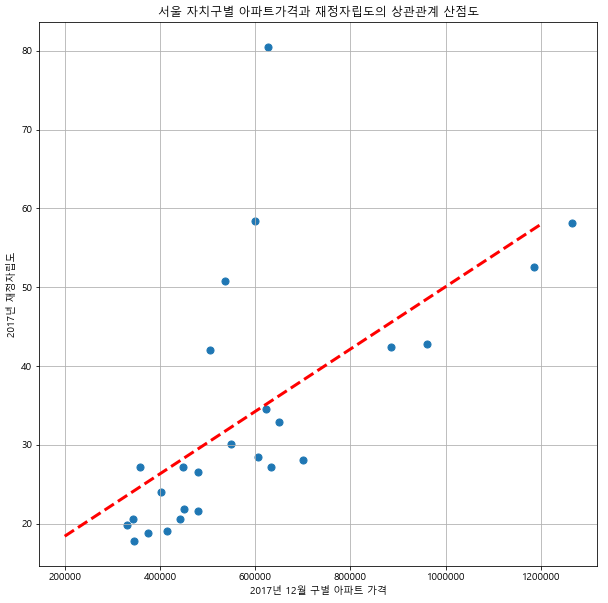

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [213]:
plt.figure(figsize=(10,10))
plt.scatter(data_result2['2017년 12월'], data_result2['2017'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
plt.xlabel('2017년 12월 구별 아파트 가격')
plt.ylabel('2017년 재정자립도')
plt.title("서울 자치구별 아파트가격과 재정자립도의 상관관계 산점도")
plt.grid()
plt.show()
plt.colorbar()
for n in range(10):
    plt.text(df_sort['2017년 12월'][n]*1.02, df_sort['2017'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    